**Simple reflex agents**

These agents select actions on the basis of the **current** percept, ignoring the rest of the percept history

The agent program for a simple reflex agent in the two-location vacuum environment.
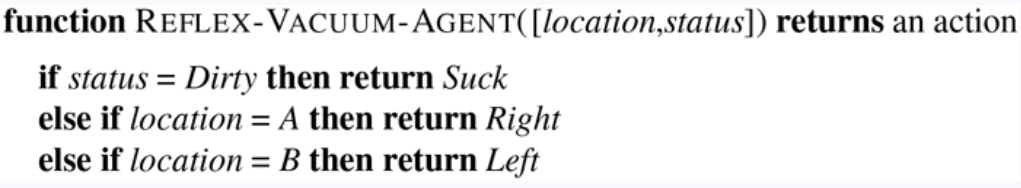

Simple reflex behaviors occur even in more complex environments

These agents work on a **condition-action rule** (also called *situation-action rule, production* or *if-then rule*), which tells the agent the action to trigger when a particular situation is encountered.

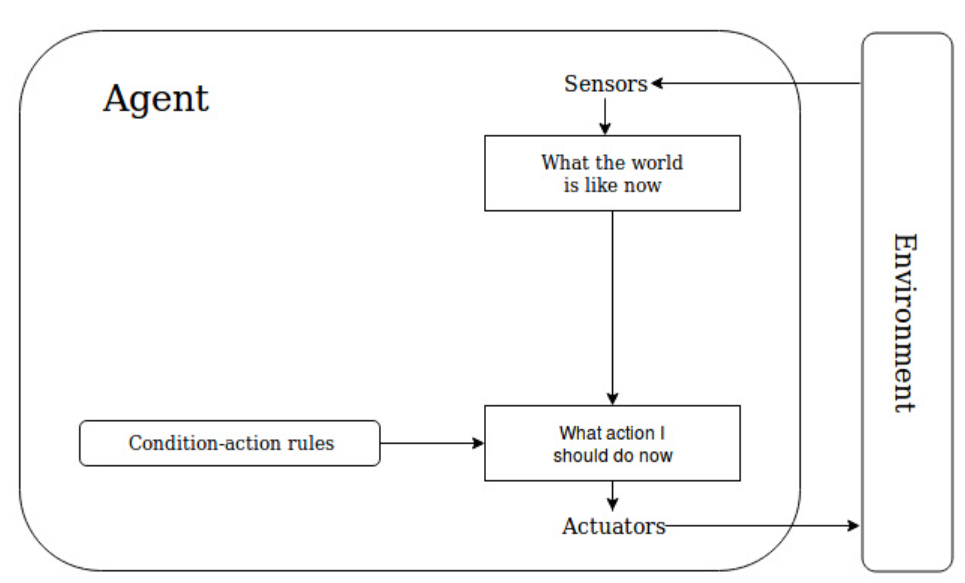

A  general and flexible approach is first to build a **general-purpose interpreter** for condition–action rules and then to create **rule sets** for specific task environments

The structure of this general program in schematic form --> below, showing how the condition–action rules allow the agent to make the connection from percept to action:

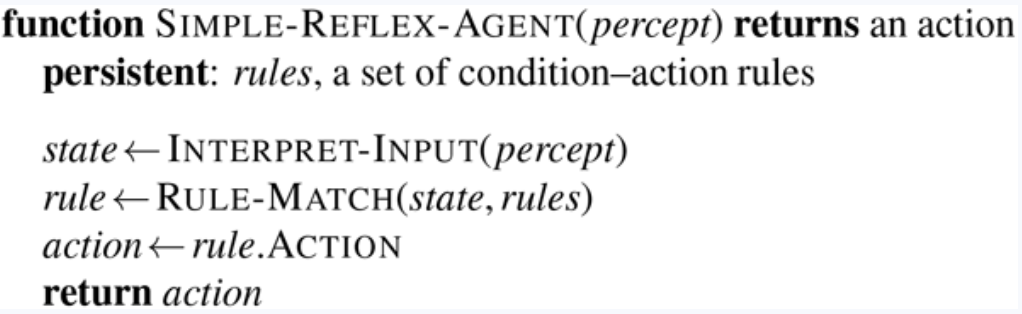

In [1]:
def SimpleReflexAgentProgram(rules, interpret_input):
    #This AP takes action based solely on the percept.

    def program(percept):
        state = interpret_input(percept)
        rule = rule_match(state, rules)
        action = rule.action
        return action

    return program

In [2]:
def rule_match(state, rules):
    """Find the first rule that matches state."""
    for rule in rules:
        if rule.matches(state):
            return rule

In [3]:
'''
rules={((0, 0), 'Dirty'): 'Suck',
        (((1, 0), 'Dirty'): 'Suck',
        (((0, 0), 'Clean'): 'Right',
        (((1, 0), 'Clean'): 'Left',
        }


        if status == 'Dirty':
            return 'Suck'
        elif location == loc_A:
            return 'Right'
        elif location == loc_B:
            return 'Left'

--> not optimal to embed logic (rules) in the AgentProgram
'''

def interpret_input(percept):
  loc, status = percept
  return status


def rule_match(state, rules):
  for key in rules:
    if state in key:
      return rules[key]




In [4]:
rules={((0, 0), 'Dirty'): 'Suck', ((1, 0), 'Dirty'): 'Suck', ((0, 0), 'Clean'): 'Right',((1, 0), 'Clean'): 'Left'}
rules

{((0, 0), 'Dirty'): 'Suck',
 ((1, 0), 'Dirty'): 'Suck',
 ((0, 0), 'Clean'): 'Right',
 ((1, 0), 'Clean'): 'Left'}

In [5]:
# These are the two locations for the two-state environment
loc_A, loc_B = (0, 0), (1, 0)

In [6]:
percept=(loc_A,'Dirty')
percept

((0, 0), 'Dirty')

In [7]:
state=interpret_input(percept)
state

'Dirty'

In [8]:
rule_match(state, rules)

'Suck'

In [9]:
percept=(loc_A,'Clean')
percept

((0, 0), 'Clean')

In [10]:
state=interpret_input(percept)
state

'Clean'

In [11]:
rule_match(state, rules)

'Right'

In [12]:
import os
import sys
import random

In [13]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A2_p3' #@param {type: "string"}
sys.path.append(path)

Mounted at /content/drive


In [14]:
!pwd

/content


In [ ]:
os.mkdir(os.path.join(path, "src"))

In [ ]:
os.chdir(os.path.join(path, "src"))

In [ ]:
!pwd

In [ ]:
!git clone https://github.com/Hanna2110/AI_intro-cs3220.git

Cloning into 'AI_intro-cs3220'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 36 (delta 8), reused 5 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 396.64 KiB | 3.22 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [16]:
!ls

drive  sample_data


In [17]:
os.chdir(os.path.join(path, "src", "AI_intro-cs3220"))

In [18]:
!git checkout cs3220_a2

D	Lab2_part2_tutorial.ipynb
Already on 'cs3220_a2'
Your branch is ahead of 'origin/cs3220_a2' by 2 commits.
  (use "git push" to publish your local commits)


In [ ]:
!git pull origin cs3220_a2

From https://github.com/Hanna2110/AI_intro-cs3220
 * branch            cs3220_a2  -> FETCH_HEAD
Already up to date.


In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/cs3220_A2_p3/src/AI_intro-cs3220


In [ ]:
path

'/content/drive/MyDrive/Colab_Notebooks/cs3220_A2_p3'

In [19]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A2_p3/src/AI_intro-cs3220' #@param {type: "string"}
sys.path.append(path)

In [20]:
from locations import *

In [21]:
loc_A, loc_B

((0, 0), (1, 0))

In [22]:
from agents import ReflexAgent

In [23]:
ra1=ReflexAgent()

In [24]:
testPercept=(loc_A,'Clean')
testPercept
ra1.program(testPercept)

'Right'

In [25]:
from trivialVacuumEnvironmentClass import *

In [26]:
tve=TrivialVacuumEnvironment()

In [27]:
tve.add_thing(ra1)

Agent is starting in random location...


In [28]:
print("State of the Environment: {}.".format(tve.status))
print("Agent is located at {}.".format(ra1.location))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Dirty'}.
Agent is located at (1, 0).


In [29]:
tve.step()

Agent percepted ((1, 0), 'Dirty').
Agent decided to do Suck.


In [30]:
tve.step()

Agent percepted ((1, 0), 'Clean').
Agent decided to do Right.


In [31]:
!git status

On branch cs3220_a2
Your branch is ahead of 'origin/cs3220_a2' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Lab2_part2_tutorial.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add agentPrograms.py

In [ ]:
!git add agents.py

In [ ]:
!git commit -m 'lab 3 part 3'

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ff5d79b81b74.(none)')


In [38]:
!git config --global user.email “hanna.yehoshyna1982@gmail.com”

In [39]:
!git config --global user.name “Hanna2110”

In [ ]:
!git commit -m 'lab 3 part 3'

[cs3220_a2 de9c345] lab 3 part 3
 2 files changed, 31 insertions(+), 2 deletions(-)


In [ ]:
!git status

On branch cs3220_a2
Your branch is ahead of 'origin/cs3220_a2' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Lab2_part2_tutorial.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/
	data.py
	rules.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add data.py

In [ ]:
!git add rules.py


In [ ]:
!git commit -m 'files with data location and rules were added'

[cs3220_a2 2a7e58c] files with data location and rules were added
 2 files changed, 4 insertions(+)
 create mode 100644 data.py
 create mode 100644 rules.py


In [32]:
!git status

On branch cs3220_a2
Your branch is ahead of 'origin/cs3220_a2' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Lab2_part2_tutorial.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

no changes added to commit (use "git add" and/or "git commit -a")


In [33]:
!git remote -v

origin	https://github.com/Hanna2110/AI_intro-cs3220.git (fetch)
origin	https://github.com/Hanna2110/AI_intro-cs3220.git (push)


In [41]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [35]:
!git remote add origin https://github.com/Hanna2110/AI_intro-cs3220.git

error: remote origin already exists.


In [36]:
!git config --global url.https://${{ secrets.PAT }}@github.com/.insteadOf https://github.com/

/bin/bash: line 1: url.https://${ secrets.PAT }@github.com/.insteadOf: bad substitution


In [42]:
!git push origin cs3220_a2

fatal: could not read Username for 'https://github.com': No such device or address
